This file is plotting the figures in the article "Selective advantage of redirected helping in a viscous population". To display all the figures, run every cells. For specific figures, run only the cells corresponding to the figures. Language: Julia 1.7.1 on jupyter.

## Libraries

In [1]:
using LinearAlgebra
using Latexify
using Plots
using FileIO
using JLD
using JLD2
using Measures
using Random


(process:27992): GLib-GIO-WARNING **: 10:15:32.649: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.124.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs


## Parameters used

In [22]:
#Parameters
p = 0.0 #Brood failure probability
N = 1000 #Number of offspring per breed
n = 3 #Number of breeding spot per patch
#Dispersal parameters
d = 0.5
c = 0.5
#Survivals
s0 = 0.7
s1 = 0.7

#Dictionary
parameters = Dict("p" => p, "N" => N, "n" => n, "d" => d, "c" => c, "s0" => s0,  "s1" => s1)

Dict{String, Real} with 7 entries:
  "d"  => 0.5
  "s1" => 0.7
  "c"  => 0.5
  "N"  => 1000
  "s0" => 0.7
  "p"  => 0.0
  "n"  => 3

## Functions used in the computations

In [3]:
#Probability of k brood failures on a patch with n breeding spot
P(k,p,n) = (factorial(n)/(factorial(k)*factorial(n-k)))*p^k*(1-p)^(n-k)

#Coefficient of consanguinity computations:
function h(k,parameters)
    d = parameters["d"]
    c = parameters["c"]
    n = parameters["n"]
    p = parameters["p"]
    h = ((1-d)*(n-k))/((1-d)*(n-k)+d*(1-c)*n*(1-p))
    return h
end

function A(parameters)
    p = parameters["p"]
    s0 = parameters["s0"]
    s1 = parameters["s1"]
   
    return p^2*s0^2+2*p*(1-p)*s0*s1+(1-p)^2*s1^2
end
function B(parameters)
    p = parameters["p"]
    s0 = parameters["s0"]
    s1 = parameters["s1"]
    n = parameters["n"]
    B = 0 
    for m in range(0,n)
        B += P(m,p,n)*((n-m)/n*(n-m-1)/(n-1)*(2*s1*(1-s1)*h(m,parameters)+(1-s1)^2*h(m,parameters)^2)
        +2*(n-m)/n*m/(n-1)*((s0*(1-s1)+(1-s0)*s1)*h(m,parameters)+(1-s0)*(1-s1)*h(m,parameters)^2)
        +m/n*(m-1)/(n-1)*(2*s0*(1-s0)*h(m,parameters)+(1-s0)^2*h(m,parameters)^2)) 
    end
    return B
end

r(parameters) = B(parameters)/(parameters["n"]*(1-A(parameters))-B(parameters)*(parameters["n"]-1))

#Reproductive value of an offspring with k brood failure
function psi(k) 
    s0 = parameters["s0"]
    s1 = parameters["s1"]
    n = parameters["n"]
    d = parameters["d"]
    p = parameters["p"]
    c = parameters["c"]
    return (k*(1-s0)+(n-k)*(1-s1))/((n-k)*(1-d)+n*(1-p)*d*(1-c))
end

#Relatedness coefficients:
function R_s(parameters) 
    Rs_n = r(parameters)
    Rs_d = 1
    n = parameters["n"]
    p = parameters["p"]
    for k in 1:n-1
        Rs_n -= r(parameters)*P(k,p,n)*k*h(k,parameters)/(n*p*(1-p^(n-1)))
        Rs_d -= r(parameters)*P(k,p,n)*k*h(k,parameters)/(n*p*(1-p^(n-1)))
    end
    Rs = parameters["s1"]*Rs_n/Rs_d
    return Rs
end

function R_f(parameters)
    n = parameters["n"]
    d = parameters["d"]
    c = parameters["c"]
    p = parameters["p"]
    Rf_n_disp = r(parameters)*d*(1-c)*P(0,p,n)*psi(0)+r(parameters)*d*(1-c)*P(n,p,n)*psi(n)
    Rf_n_stay = 0
    Rf_d = 1
    
    for k in 1:n-1
        Rf_n_disp += r(parameters)*d*(1-c)*P(k,p,n)*psi(k)
        Rf_n_stay += r(parameters)*(1-d)*P(k,p,n)*k*(1-h(k,parameters))*psi(k)/(n*p*(1-p^(n-1)))
        Rf_d -= r(parameters)*P(k,p,n)*k*h(k,parameters)/(n*p*(1-p^(n-1)))
    end
    
    Rf_n = Rf_n_disp+Rf_n_stay
    Rf = Rf_n/Rf_d
    return Rf
end

R_f (generic function with 1 method)

# Figures

## Methods

In [4]:
L = 100
R_sv = zeros(3,L,L)
R_fv = zeros(3,L,L)
ratio_v = zeros(3,L,L)
cv = range(1-1e-3, 1e-3,L) # h = 1, 0.5, 0, 1-h = 0,0.5,1
dv = range(1e-3,1-1e-3,L)
m_v = zeros(L)
i = 0

k = 0
parameters["p"] = 1e-3
for n in [2,3,10]
    i += 1
    parameters["n"] = n
    for j in range(1,L)
        parameters["c"] = cv[j]
        parameters["d"] = dv[j]
        k=0
        m_v[j] = 1-(1-parameters["d"])/(1-parameters["c"]*parameters["d"])
        for s in range(1e-3,1-1e-3,L)
            k += 1
            parameters["s0"] = s
            parameters["s1"] = s
            R_sv[i,j,k] = R_s(parameters)
            R_fv[i,j,k] = R_f(parameters)
            ratio_v[i,j,k] = R_sv[i,j,k]/R_fv[i,j,k]
        end
    end
end


## Figure 1:  Variation of the critical Cost-Benefit ratio varying with a given paramet

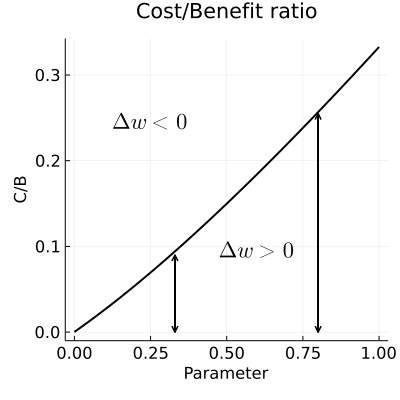

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:100.
└ @ Plots C:\Users\Alan\.julia\packages\Plots\YAlrZ\src\utils.jl:132


In [5]:
plot(size=(400,400),legend=false,xlabel="Parameter",xtickfontsize=11,ytickfontsize=11)
plot!(range(0,1,L),[R_sv[1,1,:]],subplot=1,ls=[:solid],color="black",ylabel="C/B",linewidth=2,title="Cost/Benefit ratio",legend=false)

#Annotations and arrows:
annotate!(0.6,0.1,("\$ \\Delta w>0 \$",15,:black,:center))
annotate!(0.25,0.25,("\$ \\Delta w<0 \$",15,:black,:center))
plot!([0.33,0.33],[0,0.09],arrows=true,color=:black,linewidth=1.5,label="")
plot!([0.33,0.33],[0.09,0],arrows=true,color=:black,linewidth=1.5,label="")
plot!([0.8,0.8],[0,0.255],arrow=true,color=:black,linewidth=1.5,label="")
plot!([0.8,0.8],[0.255,0],arrow=true,color=:black,linewidth=1.5,label="")

# Results:

## Low brood failure probability: \$p \approx 0\$:

## Figure 2: Critical cost-benefit ratio associated with survival benefits (y-axis) depending on the survival of breeders (x-axis), backward migration rate, m, and patch size, n 

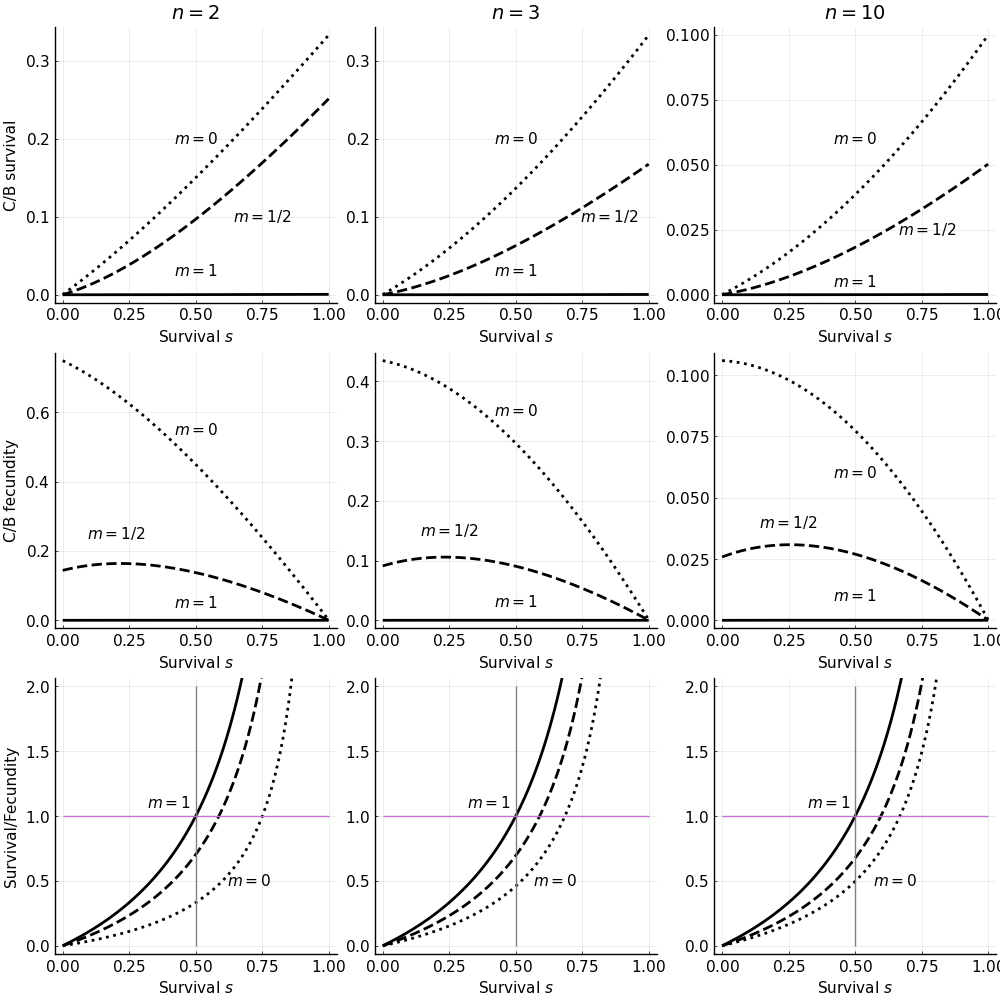

In [23]:
plot(layout=(3,3),size=(1000,1000),legend=false,xlabel="Survival \$s\$",xtickfontsize=11,ytickfontsize=11)
L_2 = sum(m_v .<=0.5)


plot!(range(0,1,L),[R_sv[1,1,:],R_sv[1,L_2,:],R_sv[1,L,:]],subplot=1,ls=[:dot :dash :solid],color="black",ylabel="C/B survival",linewidth=2,title="\$n=2\$")
plot!(range(0,1,L),[R_sv[2,1,:],R_sv[2,L_2,:],R_sv[2,L,:]],subplot=2,ls=[:dot :dash :solid],color="black",linewidth=2,title="\$n=3\$")
plot!(range(0,1,L),[R_sv[3,1,:],R_sv[3,L_2,:],R_sv[3,L,:]],subplot=3,ls=[:dot :dash :solid],color="black",linewidth=2,title="\$n=10\$")

plot!(range(0,1,L),[R_fv[1,1,:],R_fv[1,L_2,:],R_fv[1,L,:]],subplot=4,ls=[:dot :dash :solid],color="black",ylabel="C/B fecundity",linewidth=2)
plot!(range(0,1,L),[R_fv[2,1,:],R_fv[2,L_2,:],R_fv[2,L,:]],subplot=5,ls=[:dot :dash :solid],color="black",linewidth=2)
plot!(range(0,1,L),[R_fv[3,1,:],R_fv[3,L_2,:],R_fv[3,L,:]],subplot=6,ls=[:dot :dash :solid],color="black",linewidth=2)

plot!(range(0,1,L),[ratio_v[1,1,:],ratio_v[1,L_2,:],ratio_v[1,L,:]],subplot=7,ls=[:dot :dash :solid],color="black",yaxis=[0,2],ylabel="Survival/Fecundity",linewidth=2)
plot!(range(0,1,L),ones(L),subplot=7)
plot!(0.5*ones(L),range(0,2,L),subplot=7,color=:gray)
plot!(range(0,1,L),[ratio_v[2,1,:],ratio_v[2,L_2,:],ratio_v[2,L,:]],subplot=8,ls=[:dot :dash :solid],color="black",yaxis=[0,2],linewidth=2)
plot!(range(0,1,L),ones(L),subplot=8)
plot!(0.5*ones(L),range(0,2,L),subplot=8,color=:gray)
plot!(range(0,1,L),[ratio_v[3,1,:],ratio_v[3,L_2,:],ratio_v[3,L,:]],subplot=9,ls=[:dot :dash :solid],color="black",yaxis=[0,2],linewidth=2)
plot!(range(0,1,L),ones(L),subplot=9)
plot!(0.5*ones(L),range(0,2,L),subplot=9,color=:gray)

annotate!(0.5,0.2,("\$m = 0\$",11,:black,:center),subplot=1)
annotate!(0.5,0.2,("\$m=0\$",11,:black,:center),subplot=2)
annotate!(0.5,0.06,("\$m= 0\$",11,:black,:center),subplot=3)
annotate!(0.5,0.55,("\$m=0\$",11,:black,:center),subplot=4)
annotate!(0.5,0.35,("\$m=0\$",11,:black,:center),subplot=5)
annotate!(0.5,0.06,("\$m=0\$",11,:black,:center),subplot=6)
annotate!(0.7,0.5,("\$m=0\$",11,:black,:center),subplot=7)
annotate!(0.65,0.5,("\$m=0\$",11,:black,:center),subplot=8)
annotate!(0.65,0.5,("\$m=0\$",11,:black,:center),subplot=9)


annotate!(0.75,0.1,("\$m=1/2\$",11,:black,:center),subplot=1)
annotate!(0.85,0.1,("\$m=1/2\$",11,:black,:center),subplot=2)
annotate!(0.77,0.025,("\$m=1/2\$",11,:black,:center),subplot=3)
annotate!(0.2,0.25,("\$m=1/2\$",11,:black,:center),subplot=4)
annotate!(0.25,0.15,("\$m=1/2\$",11,:black,:center),subplot=5)
annotate!(0.25,0.04,("\$m=1/2\$",11,:black,:center),subplot=6)


annotate!(0.5,0.03,("\$m=1\$",11,:black,:center),subplot=1)
annotate!(0.5,0.03,("\$m= 1\$",11,:black,:center),subplot=2)
annotate!(0.5,0.005,("\$m= 1\$",11,:black,:center),subplot=3)
annotate!(0.5,0.05,("\$m= 1\$",11,:black,:center),subplot=4)
annotate!(0.5,0.03,("\$m=1\$",11,:black,:center),subplot=5)
annotate!(0.5,0.01,("\$m= 1\$",11,:black,:center),subplot=6)
annotate!(0.4,1.1,("\$m= 1\$",11,:black,:center),subplot=7)
annotate!(0.4,1.1,("\$m= 1\$",11,:black,:center),subplot=8)
annotate!(0.4,1.1,("\$m=1\$",11,:black,:center),subplot=9)

## Larger brood failure probability: \$p>0\$

## Figure 3: Contour plots of the critical cost-benefit ratio associated with survival benefits depending on the survival (y-axis), brood failure probability (x-axis), patch size n, and backward migration rate m

In [17]:
L = 100
sv = range(1e-2,1-1e-2,L) 
pv = range(1e-2,1-1e-2,L) 
cv = [1e-2,1e-2,1e-2]
dv = [1e-2,1/2,1-1e-2]
nv = [2,3,10]

R_spsv = zeros(3,3,L,L)
R_fpsv = zeros(3,3,L,L)
ratio_psv = zeros(3,3,L,L)

for i in range(1,3)
    parameters["n"] = nv[i]
    for j in range(1,3)
        parameters["c"] = cv[j]
        parameters["d"] = dv[j]
        for k in range(1,L)
                parameters["s0"] = sv[k]
                parameters["s1"] = sv[k]
            for l in range(1,L)
                parameters["p"] = pv[l]
                R_spsv[i,j,k,l] = R_s(parameters)
                R_fpsv[i,j,k,l] = R_f(parameters)
                ratio_psv[i,j,k,l] = R_spsv[i,j,k,l]/R_fpsv[i,j,k,l]
            end
        end
    end
end

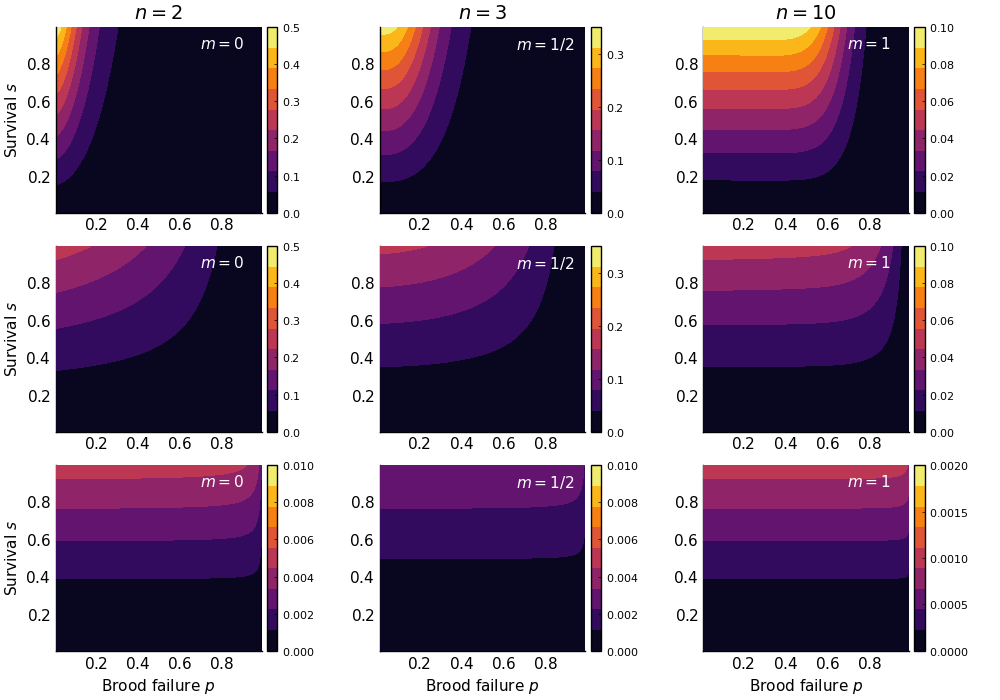

In [18]:
pyplot()
plot(layout=(3,3),size=(1000,700),xtickfontsize=11,ytickfontsize=11,right_margin=-10mm)
lvl_1 = range(0,0.5,10)
lvl_2 = range(0,0.35,10)
lvl_3 = range(0,0.1,10)
lvl_4 = range(0,0.01,10)
lvl_5 = range(0,0.002,10)
contourf!(sv,pv,R_spsv[1,1,:,:],subplot=1,ylabel="Survival \$s\$",title="\$n=2\$",levels=lvl_1,clims=(0,0.5))
contourf!(sv,pv,R_spsv[2,1,:,:],subplot=2,title="\$n=3\$",levels=lvl_2,clims=(0,0.35))
contourf!(sv,pv,R_spsv[3,1,:,:],subplot=3,title="\$n=10\$",levels=lvl_3,clims=(0,0.1))

contourf!(sv,pv,R_spsv[1,2,:,:],subplot=4,ylabel="Survival \$s\$",levels=lvl_1,clims=(0,0.5))
contourf!(sv,pv,R_spsv[2,2,:,:],subplot=5,levels=lvl_2,clims=(0,0.35))
contourf!(sv,pv,R_spsv[3,2,:,:],subplot=6,levels=lvl_3,clims=(0,0.1))

contourf!(sv,pv,R_spsv[1,3,:,:],subplot=7,ylabel="Survival \$s\$",xlabel="Brood failure \$p\$",levels=lvl_4,clims=(0,0.01))
contourf!(sv,pv,R_spsv[2,3,:,:],subplot=8,xlabel="Brood failure \$p\$",levels=lvl_4,clims=(0,0.01))
contourf!(sv,pv,R_spsv[3,3,:,:],subplot=9,xlabel="Brood failure \$p\$",levels=lvl_5,clims=(0,0.002))

annotate!(0.8,0.9,("\$m = 0\$",11,:white,:center),subplot=1)
annotate!(0.8,0.9,("\$m = 1/2\$",11,:white,:center),subplot=2)
annotate!(0.8,0.9,("\$m = 1\$",11,:white,:center),subplot=3)
annotate!(0.8,0.9,("\$m = 0\$",11,:white,:center),subplot=4)
annotate!(0.8,0.9,("\$m = 1/2\$",11,:white,:center),subplot=5)
annotate!(0.8,0.9,("\$m = 1\$",11,:white,:center),subplot=6)
annotate!(0.8,0.9,("\$m = 0\$",11,:white,:center),subplot=7)
annotate!(0.8,0.9,("\$m = 1/2\$",11,:white,:center),subplot=8)
annotate!(0.8,0.9,("\$m = 1\$",11,:white,:center),subplot=9)

## Figure 4: Critical cost-benefit ratio associated with survival benefits for different patch sizes: dotted lines, n = 2, dashed lines, n = 3, solid lines: n = 10 

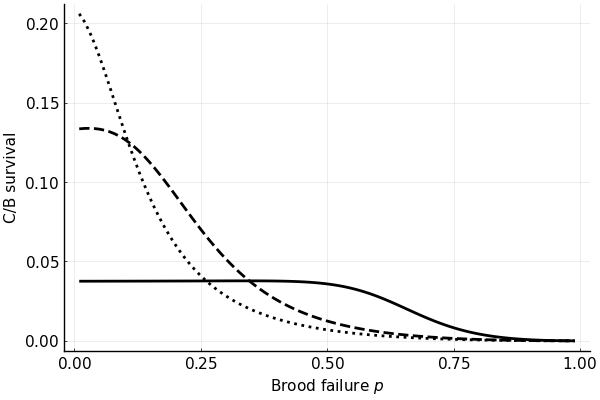

In [21]:
plot(xtickfontsize=11,ytickfontsize=11,ylabel="C/B survival",xlabel="Brood failure \$p\$",legend=false)
plot!(pv,R_spsv[1,1,50,:],ls=:dot,linewidth=2,color="black",label="\$n=2\$")
plot!(pv,R_spsv[2,1,50,:],ls=:dash,linewidth=2,color="black",label="\$n=3\$")
plot!(pv,R_spsv[3,1,50,:],linewidth=2,color="black",label="\$n=10\$")


## Figure 5: Contour plots of the critical cost-benefit ratio associated with fecundity benefits depending on the survival (y-axis), brood failure probability (x-axis), patch size \$n\$, and backward migration rate \$m\$

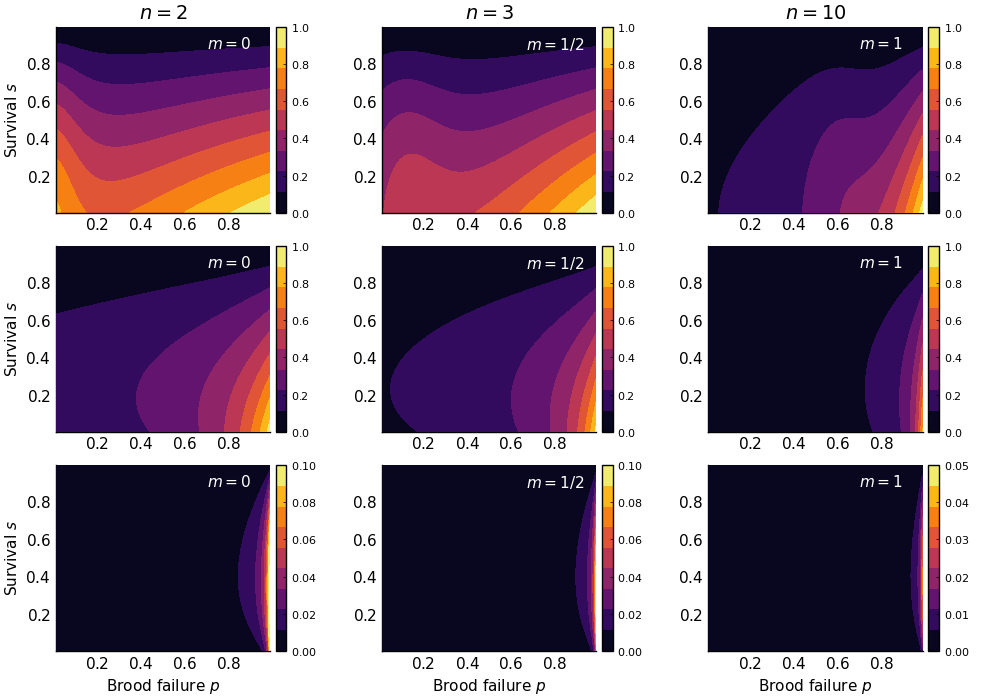

In [19]:
pyplot()
plot(layout=(3,3),size=(1000,700),xtickfontsize=11,ytickfontsize=11,right_margin=-10mm)
lvl_1 = range(0,1,10)
lvl_2 = range(0,0.5,10)
lvl_3 = range(0,0.1,10)
lvl_4 = range(0,0.05,10)
contourf!(sv,pv,R_fpsv[1,1,:,:],subplot=1,ylabel="Survival \$s\$",title="\$n=2\$",levels=lvl_1,clims=(0,1))
contourf!(sv,pv,R_fpsv[2,1,:,:],subplot=2,title="\$n=3\$",levels=lvl_1,clims=(0,1))
contourf!(sv,pv,R_fpsv[3,1,:,:],subplot=3,title="\$n=10\$",levels=lvl_1,clims=(0,1))

contourf!(sv,pv,R_fpsv[1,2,:,:],subplot=4,ylabel="Survival \$s\$",levels=lvl_1,clims=(0,1))
contourf!(sv,pv,R_fpsv[2,2,:,:],subplot=5,levels=lvl_1,clims=(0,1))
contourf!(sv,pv,R_fpsv[3,2,:,:],subplot=6,levels=lvl_1,clims=(0,1))

contourf!(sv,pv,R_fpsv[1,3,:,:],subplot=7,ylabel="Survival \$s\$",xlabel="Brood failure \$p\$",levels=lvl_3,clims=(0,0.1))
contourf!(sv,pv,R_fpsv[2,3,:,:],subplot=8,xlabel="Brood failure \$p\$",levels=lvl_3,clims=(0,0.1))
contourf!(sv,pv,R_fpsv[3,3,:,:],subplot=9,xlabel="Brood failure \$p\$",levels=lvl_4,clims=(0,0.05))


annotate!(0.8,0.9,("\$m = 0\$",11,:white,:center),subplot=1)
annotate!(0.8,0.9,("\$m = 1/2\$",11,:white,:center),subplot=2)
annotate!(0.8,0.9,("\$m = 1\$",11,:white,:center),subplot=3)
annotate!(0.8,0.9,("\$m = 0\$",11,:white,:center),subplot=4)
annotate!(0.8,0.9,("\$m = 1/2\$",11,:white,:center),subplot=5)
annotate!(0.8,0.9,("\$m = 1\$",11,:white,:center),subplot=6)
annotate!(0.8,0.9,("\$m = 0\$",11,:white,:center),subplot=7)
annotate!(0.8,0.9,("\$m = 1/2\$",11,:white,:center),subplot=8)
annotate!(0.8,0.9,("\$m = 1\$",11,:white,:center),subplot=9)

## Figure 6: Equal level of the critical cost-benefit ratios associated with survival and fecundity (\$sRs = N \psi Rf\$ ) depending on breeder’s survival (y-axis), brood failure probability (x-axis), patch size, n, and backward migration rate

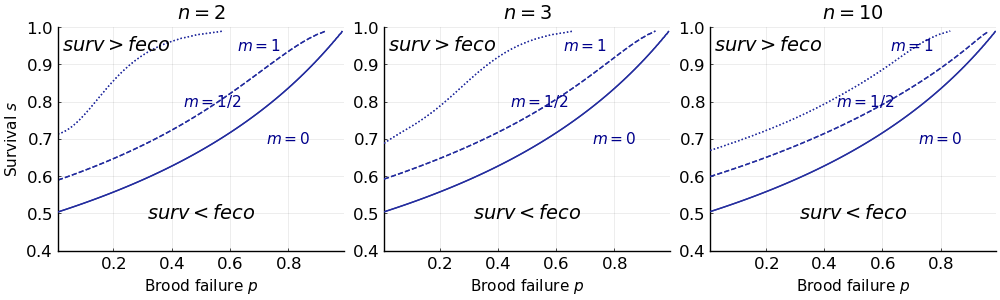

In [20]:
pyplot()
plot(layout=(1,3),size=(1000,300),xlabel="Brood failure \$p\$",legend=false,xtickfontsize=12,ytickfontsize=12,color=:grays,ylim=(0.4,1))
contour!(sv,pv,log.(ratio_psv[1,1,:,:]),levels=range(0,1e-3,2),subplot=1,ls=:dot,color=:blues,ylabel="Survival \$s\$",title="\$n=2\$")
contour!(sv,pv,log.(ratio_psv[1,2,:,:]),levels=range(0,1e-3,2),subplot=1,ls=:dash,color=:blues)
contour!(sv,pv,log.(ratio_psv[1,3,:,:]),levels=range(0,1e-3,2),subplot=1,ls=:solid,color=:blues)

contour!(sv,pv,log.(ratio_psv[2,1,:,:]),levels=range(0,1e-3,2),subplot=2,ls=:dot,color=:blues,title="\$n=3\$")
contour!(sv,pv,log.(ratio_psv[2,2,:,:]),levels=range(0,1e-3,2),subplot=2,ls=:dash,color=:blues)
contour!(sv,pv,log.(ratio_psv[2,3,:,:]),levels=range(0,1e-3,2),subplot=2,ls=:solid,color=:blues)

contour!(sv,pv,log.(ratio_psv[3,1,:,:]),levels=range(0,1e-3,2),subplot=3,ls=:dot,color=:blues,title="\$n=10\$")
contour!(sv,pv,log.(ratio_psv[3,2,:,:]),levels=range(0,1e-3,2),subplot=3,ls=:dash,color=:blues)
contour!(sv,pv,log.(ratio_psv[3,3,:,:]),levels=range(0,1e-3,2),subplot=3,ls=:solid,color=:blues)
annotate!(0.5,0.5, "\$surv<feco\$")
annotate!(0.21,0.95, "\$surv>feco\$")
annotate!(0.7,0.95,("\$m=1\$",11,:darkblue,:center))
annotate!(0.54,0.8,("\$m=1/2\$",11,:darkblue,:center))
annotate!(0.8,0.7,("\$m=0\$",11,:darkblue,:center))
